Import libraries.

In [1]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk import word_tokenize
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import numpy as np
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud, STOPWORDS

Read in the lyrics file.

In [84]:
with open("lyrics.txt", "r") as file:
    lyrics = file.read()

In [85]:
lyrics[:3000]

'\n    [ ]\nI was born inside a small town, I lost that state of mind\nLearned to sing inside the Lord\'s house, but stopped at the age of nine\nI forget when I get awards now the wave I had to ride\nThe paving stones I played upon, they kept me on the grind\nSo blame it on the pain that blessed me with the life\nFriends and family filled with envy when they should be filled with pride\nAnd when the world\'s against me is when I really come alive\nAnd everyday that Satan tempts me, I try to take it in my stride\nYou know that I\'ve got whisky with white lines and smoke in my lungs\nI think life has got to the point I know without it\'s no fun\nI need to get in the right mind and clear myself up\nInstead, I look in the mirror questioning what I\'ve become\nI guess it\'s a stereotypical day for someone like me\nWithout a nine-to-five job or an uni degree\nTo be caught up in the trappings of the industry\nShow me the locked doors, I find another use for the key\nAnd you\'ll see\n\n[  1]\n

Split songs apart.

In [86]:
lyrics = lyrics.split("\n\n\n")

In [88]:
lyrics[0]

"\n    [ ]\nI was born inside a small town, I lost that state of mind\nLearned to sing inside the Lord's house, but stopped at the age of nine\nI forget when I get awards now the wave I had to ride\nThe paving stones I played upon, they kept me on the grind\nSo blame it on the pain that blessed me with the life\nFriends and family filled with envy when they should be filled with pride\nAnd when the world's against me is when I really come alive\nAnd everyday that Satan tempts me, I try to take it in my stride\nYou know that I've got whisky with white lines and smoke in my lungs\nI think life has got to the point I know without it's no fun\nI need to get in the right mind and clear myself up\nInstead, I look in the mirror questioning what I've become\nI guess it's a stereotypical day for someone like me\nWithout a nine-to-five job or an uni degree\nTo be caught up in the trappings of the industry\nShow me the locked doors, I find another use for the key\nAnd you'll see\n\n[  1]\nI'm wel

Get rid of special characters.

In [89]:
lyrics = [re.sub("[\(\[].*?[\)\]]", "", lyric) for lyric in lyrics]

In [91]:
lyrics = [lyric.replace("\n", " ") for lyric in lyrics]

In [92]:
lyrics[0]

"      I was born inside a small town, I lost that state of mind Learned to sing inside the Lord's house, but stopped at the age of nine I forget when I get awards now the wave I had to ride The paving stones I played upon, they kept me on the grind So blame it on the pain that blessed me with the life Friends and family filled with envy when they should be filled with pride And when the world's against me is when I really come alive And everyday that Satan tempts me, I try to take it in my stride You know that I've got whisky with white lines and smoke in my lungs I think life has got to the point I know without it's no fun I need to get in the right mind and clear myself up Instead, I look in the mirror questioning what I've become I guess it's a stereotypical day for someone like me Without a nine-to-five job or an uni degree To be caught up in the trappings of the industry Show me the locked doors, I find another use for the key And you'll see   I'm well aware of certain things tha

Get rid of empty strings and strings with spaces.

In [93]:
lyrics = [lyric for lyric in lyrics if lyric != '' and lyric != '    ']

In [95]:
lyrics[0]

"      I was born inside a small town, I lost that state of mind Learned to sing inside the Lord's house, but stopped at the age of nine I forget when I get awards now the wave I had to ride The paving stones I played upon, they kept me on the grind So blame it on the pain that blessed me with the life Friends and family filled with envy when they should be filled with pride And when the world's against me is when I really come alive And everyday that Satan tempts me, I try to take it in my stride You know that I've got whisky with white lines and smoke in my lungs I think life has got to the point I know without it's no fun I need to get in the right mind and clear myself up Instead, I look in the mirror questioning what I've become I guess it's a stereotypical day for someone like me Without a nine-to-five job or an uni degree To be caught up in the trappings of the industry Show me the locked doors, I find another use for the key And you'll see   I'm well aware of certain things tha

Define a vectorizer.

In [113]:
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", min_df = 0.01, max_df = 0.5, token_pattern='\\b[a-z][a-z]+\\b')

Apply the vectorizer to the file.

In [114]:
tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics)

In [115]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names())

In [116]:
tfidf_df.head()

,act,admit,afraid,age,ago,ah,ahead,ai,ain,aint,...,ya,yea,yeah,year,years,yellow,yes,yesterday,yo,young
0,0.0,0.0,0.0,0.173977,0.0,0.0,0.0,0.0,0.04596,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.185852,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Reduce dimensionality.

In [117]:
nmf = NMF(n_components = 6)

In [118]:
fit = nmf.fit_transform(tfidf_df)

In [119]:
fit_df = pd.DataFrame(fit)

In [125]:
fit_df.head()

,0,1,2,3,4,5
0,0.026748,0.000403,0.000000,0.000000,0.009211,0.115485
1,0.011757,0.000000,0.000000,0.000000,0.010955,0.064559
2,0.052061,0.000000,0.013219,0.000000,0.029672,0.069967
3,0.011670,0.000000,0.104187,0.000444,0.120607,0.032070
4,0.010076,0.000137,0.063396,0.000000,0.017065,0.063304


In [128]:
fit_df["max"] = fit_df.idxmax(axis = 1) # Max indicates which class one song most likely belongs to.

In [129]:
fit_df.head()

,0,1,2,3,4,5,max
0,0.026748,0.000403,0.000000,0.000000,0.009211,0.115485,5
1,0.011757,0.000000,0.000000,0.000000,0.010955,0.064559,5
2,0.052061,0.000000,0.013219,0.000000,0.029672,0.069967,5
3,0.011670,0.000000,0.104187,0.000444,0.120607,0.032070,4
4,0.010076,0.000137,0.063396,0.000000,0.017065,0.063304,2


How many songs does each class have?

In [130]:
fit_df.groupby("max")["max"].count()

max
0    1894
1     451
2     771
3     411
4     667
5    4005
Name: max, dtype: int64

In [131]:
components = pd.DataFrame(nmf.components_, columns = tfidf_df.columns)

In [132]:
components

,act,admit,afraid,age,ago,ah,ahead,ai,ain,aint,...,ya,yea,yeah,year,years,yellow,yes,yesterday,yo,young
0,0.070576,0.030003,0.005460,0.013823,0.000716,0.067109,0.027431,0.000000,0.83378,0.091696,...,0.398012,0.061490,0.800294,0.046056,0.020155,0.011260,0.058271,0.000000,0.227633,0.093390
1,0.000000,0.000000,0.000000,0.000000,0.000125,0.004659,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.008216,0.000000,0.000000,0.000024,0.000863,0.000000,0.000518,0.003550
2,0.000000,0.000000,0.006241,0.000000,0.000000,0.007277,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024698,0.000000,0.038584,0.015406,0.000000,0.014223
3,0.000537,0.000000,0.000000,0.006354,0.001509,0.035532,0.003216,0.347041,0.00000,0.004394,...,0.075800,0.001657,0.000000,0.002733,0.000000,0.000047,0.004899,0.000000,0.127973,0.002712
4,0.000000,0.000000,0.001487,0.003128,0.000000,0.147383,0.000000,0.000000,0.00000,0.000000,...,0.008904,0.001744,0.491948,0.000000,0.000000,0.000000,0.045344,0.009211,0.000000,0.000000
5,0.006398,0.015307,0.082940,0.026698,0.051823,0.021707,0.026885,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.049817,0.102197,0.024112,0.092404,0.066442,0.000000,0.076944


Sneak a peek at each class' top words.

In [133]:
for n in range(6):
    print(str(n))
    print(components.iloc[n,:].sort_values(ascending = False)[:20])
    print("\n")

0
got      1.320310
don      1.173628
like     1.167086
ain      0.833780
yeah     0.800294
just     0.789209
know     0.756072
wanna    0.721429
baby     0.717074
shit     0.672546
girl     0.622180
want     0.608872
fuck     0.535456
cause    0.532567
man      0.479353
nigga    0.467331
need     0.408390
ya       0.398012
em       0.388846
make     0.363292
Name: 0, dtype: float64


1
jag       2.149081
och       1.243314
du        1.226791
det       1.070788
en        0.737827
som       0.697690
mig       0.665457
att       0.656969
vi        0.594604
dig       0.548032
inte      0.503568
men       0.434545
har       0.433091
kan       0.408187
om        0.407526
var       0.376566
vill      0.309402
med       0.298917
nu        0.289523
kommer    0.279004
Name: 1, dtype: float64


2
love       3.030367
baby       0.355133
heart      0.298813
know       0.225943
true       0.196882
want       0.190423
need       0.183727
don        0.152934
say        0.141170
darling    0.125171
fe

In [135]:
clusters = range(1,50)
meandist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(fit)
    clusassign = model.predict(fit)
    meandist.append(sum(np.min(cdist(fit, model.cluster_centers_, "euclidean"), axis = 1)) / fit.shape[0])

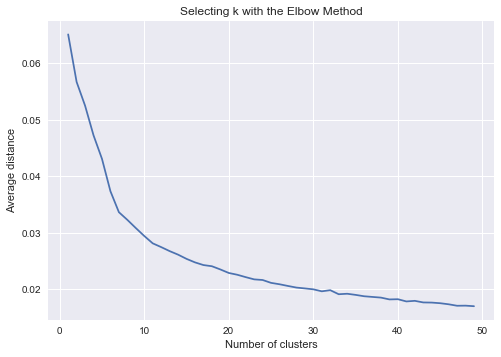

In [136]:
plt.plot(clusters, meandist)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Selecting k with the Elbow Method")
plt.show()

In [137]:
kmeans = KMeans(n_clusters = 6)

In [138]:
km = kmeans.fit_transform(fit)

In [139]:
zipped = list(zip(list(kmeans.predict(fit)), lyrics))

In [140]:
zipped_df = pd.DataFrame(zipped, columns = ["type", "lyrics"])

In [141]:
c = zipped_df.sort_values("type")

In [142]:
c0_index = list(c[c["type"] == 0].index)
c1_index = list(c[c["type"] == 1].index)
c2_index = list(c[c["type"] == 2].index)
c3_index = list(c[c["type"] == 3].index)
c4_index = list(c[c["type"] == 4].index)
c5_index = list(c[c["type"] == 5].index)

In [143]:
c0_lyrics = []
for c0 in c0_index:
    c0_lyrics.append(lyrics[c0])
c1_lyrics = []
for c1 in c1_index:
    c1_lyrics.append(lyrics[c1])
c2_lyrics = []
for c2 in c2_index:
    c2_lyrics.append(lyrics[c2])
c3_lyrics = []
for c3 in c3_index:
    c3_lyrics.append(lyrics[c3])
c4_lyrics = []
for c4 in c4_index:
    c4_lyrics.append(lyrics[c4])
c5_lyrics = []
for c5 in c5_index:
    c5_lyrics.append(lyrics[c5])

In [144]:
print(len(c0_lyrics))
print(len(c1_lyrics))
print(len(c2_lyrics))
print(len(c3_lyrics))
print(len(c4_lyrics))
print(len(c5_lyrics))

440
1670
4724
431
630
304


In [145]:
c0_lyrics[0]

"    Hey kids, shake it loose together The spotlight's hitting something That's been known to change the weather We'll kill the fatted calf tonight So stick around You're gonna hear electric music Solid walls of sound   :  Say, Candy and Ronnie, have you seen them yet But they're so spaced out, B-B-B-Bennie and the Jets Oh but they're weird and they're wonderful Oh Bennie she's really keen She's got electric boots a mohair suit You know I read it in a magazine B-B-B-Bennie and the Jets  Hey kids, plug into the faithless Maybe they're blinded But Bennie makes them ageless We shall survive, let us take ourselves along Where we fight our parents out in the streets To find who's right and who's wrong  Oh, Candy and Ronnie have you seen them yet Oh, they're so spaced out, Bennie and the Jets Oh, but they're weird and they're wonderful Oh, Bennie she's really keen She's got electric boots, a mohair suit You know I read it in a magazine, oh, Bennie and the Jets  Oh, Candy and Ronnie have you 

In [146]:
c0_lyrics = "".join(c0_lyrics)
c1_lyrics = "".join(c1_lyrics)
c2_lyrics = "".join(c2_lyrics)
c3_lyrics = "".join(c3_lyrics)
c4_lyrics = "".join(c4_lyrics)
c5_lyrics = "".join(c5_lyrics)

In [159]:
colors = 'rgcymb'

In [160]:
plot_colors = []

In [162]:
for pred in kmeans.predict(fit):
    plot_colors.append(colors[pred])

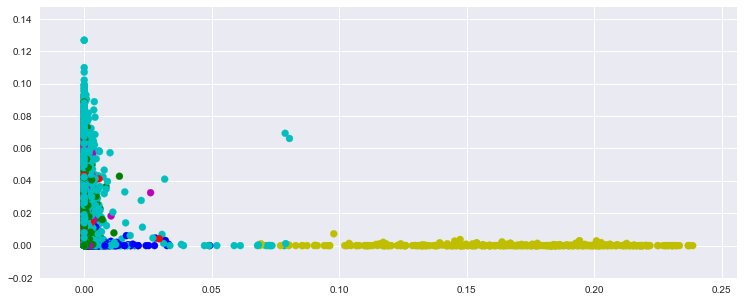

In [163]:
fig_2 = plt.figure(figsize = (12.5, 5))
ax = fig_2.add_subplot(111)
ax.scatter(ft[:, 1], ft[:, 0], c = plot_colors)

In [164]:
reds = kmeans.predict(fit) == 0
greens = kmeans.predict(fit) == 1
cyans = kmeans.predict(fit) == 2
yellows = kmeans.predict(fit) == 3
magentas = kmeans.predict(fit) == 4
blues = kmeans.predict(fit) == 5

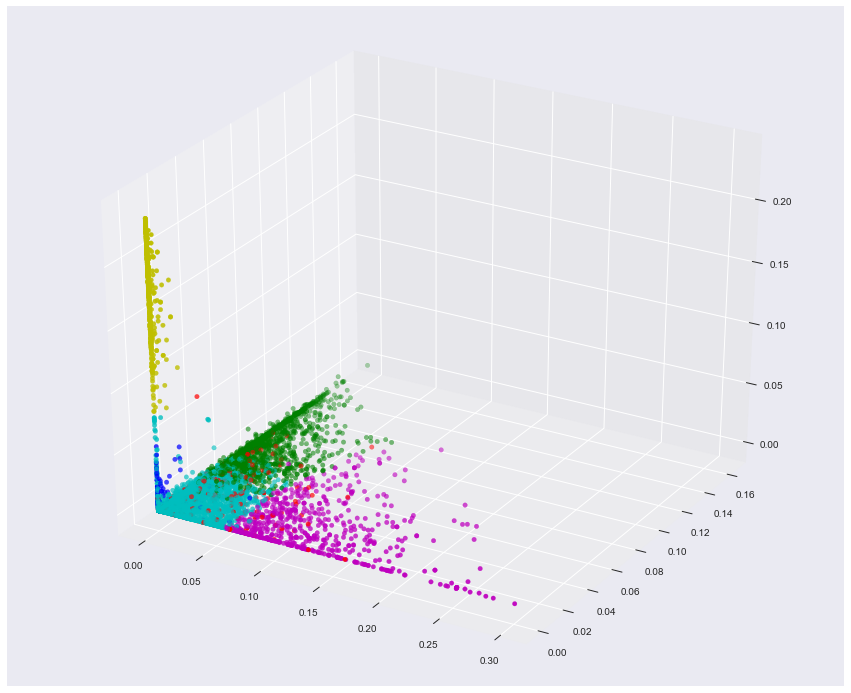

In [165]:
fig3 = plt.figure(figsize = (15, 12.5))
ax = fig3.add_subplot(111, projection='3d')
ax.scatter(fit[:, 2], fit[:, 0], fit[:, 1], c = plot_colors)

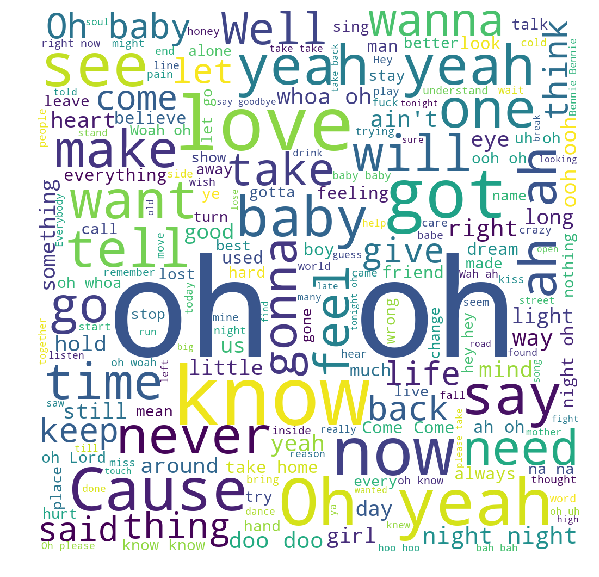

In [166]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c0_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

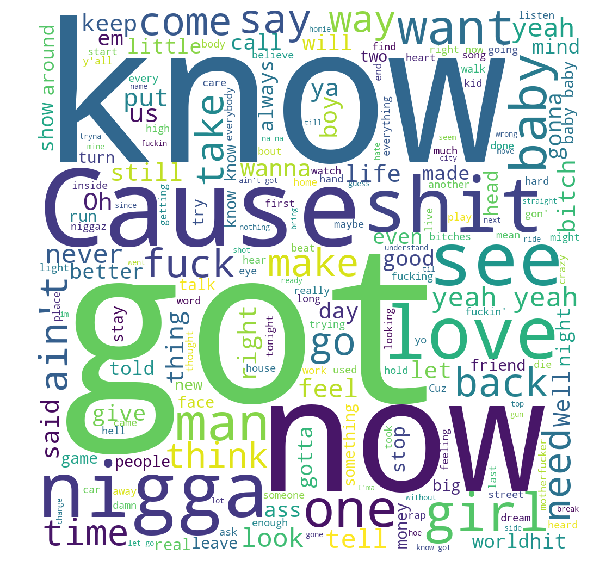

In [167]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c1_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

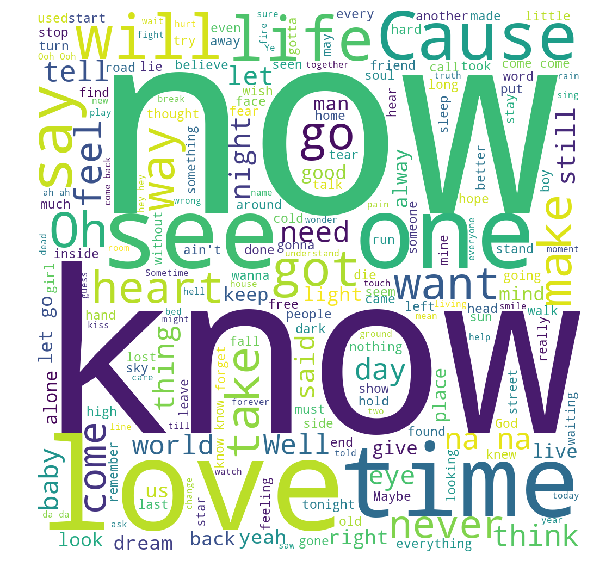

In [168]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c2_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

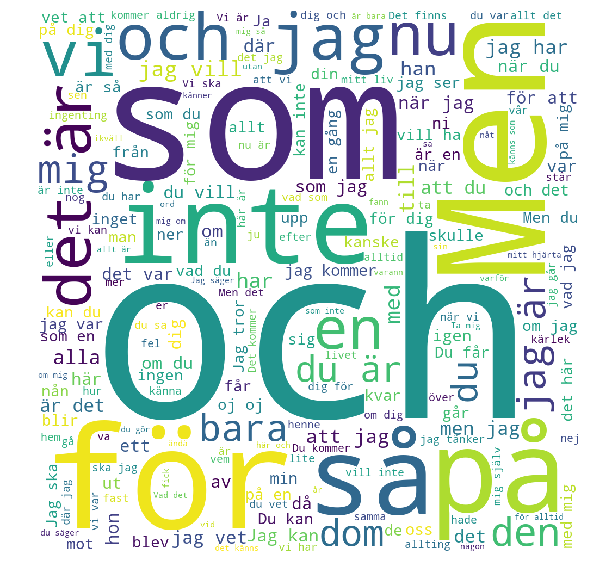

In [169]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c3_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

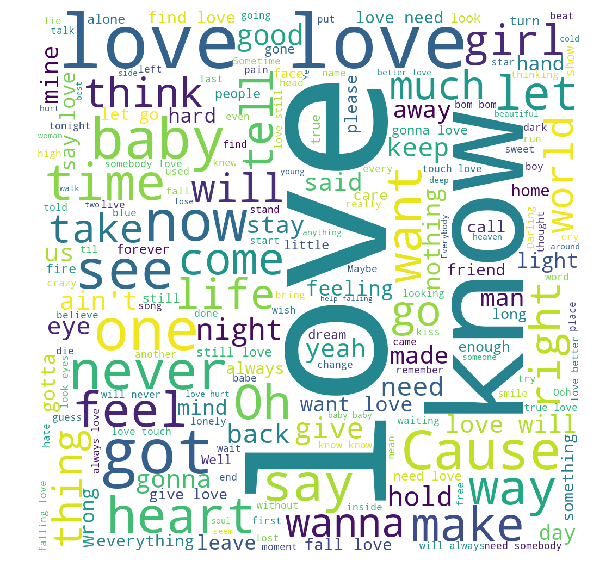

In [170]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c4_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

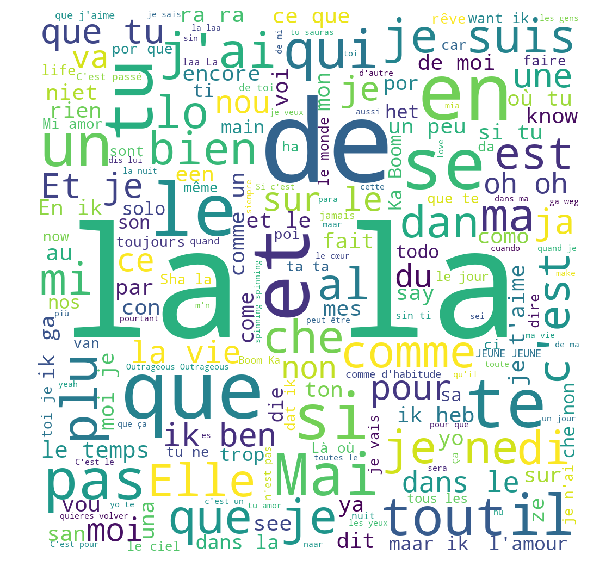

In [171]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1000,
                          height=1000
                         ).generate(c5_lyrics)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Random stuff for fun

In [63]:
with open("lyrics", "r") as file:
    data = file.read()

In [64]:
genesis = lyrics

In [65]:
def splitter(genesis):
    for element in genesis:
        for word in element.split():
            if element != "":
                yield word.strip()

In [66]:
markov = {}
first_prev_word = ""
second_prev_word = ""
for word in splitter(genesis):
    if (first_prev_word, second_prev_word) in markov.keys():
        markov[(first_prev_word, second_prev_word)] += [word]
    else:
        markov[(first_prev_word, second_prev_word)] = [word]
    first_prev_word, second_prev_word = second_prev_word, word

In [67]:
def lyrics_generator(sample, length):
    sample = sample.split()
    for i in range(length):
        add_word = random.choice(markov[tuple(sample[-2:])])
        sample = sample + [add_word]
    print(" ".join(sample))

In [68]:
def lyrics_generator(sample, length):
    sample = sample.split()
    for i in range(length):
        add_word = random.choice(markov[tuple(sample[-2:])])
        sample = sample + [add_word]
    print(" ".join(sample))

In [72]:
lyrics_generator("I am", 80)

I am not ashamed Just need love when love hurts It won't go away Ah, what memories fresco of hills I must say your baby tonight You've given me The way we stalk The way it is : That's just what to feel inside Cuz it's our hearts I know it's real I could write the truth of it all for you If you duck him up But the primaso puff on the inner me - I find you no more AHHHHHH!!
